<a href="https://colab.research.google.com/github/triggereddown/Topic_Modelling/blob/main/TwitterDataset_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install Required Packages
!pip install spacy pandas gensim matplotlib tqdm wordcloud sentence-transformers scikit-learn
!python -m spacy download en_core_web_sm

# ✅ STEP 2: Import Libraries
import pandas as pd
import spacy
import random
import numpy as np
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# ✅ STEP 3: Load & Preprocess CSV Data
# 🔁 Upload your dataset here
from google.colab import files
uploaded = files.upload()

# 🔃 Replace 'your_file.csv' and 'text' with actual file name/column
filename = list(uploaded.keys())[0]
df = pd.read_csv('twitter_dataset.csv', on_bad_lines='skip')
df = df.dropna(subset=['text'])  # Replace 'text' with your column name if needed
df = df[df['text'].apply(lambda x: isinstance(x, str))]

# 💬 Sample to limit size (optional)
data = df.sample(n=3000)['text']  # Use smaller sample for faster results

# ⚙️ spaCy Preprocessing
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

data = data.apply(preprocess)

# ✅ STEP 4: Prepare Corpus & Dictionary
dictionary = Dictionary(data)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in data]

# ✅ STEP 5: ACO Hyperparameter Optimization
topic_range = list(range(2, 10))
passes_range = list(range(5, 20))
alpha_range = ['symmetric', 'asymmetric', 'auto']

n_ants = 8
n_iterations = 5
pheromone = np.ones((len(topic_range), len(passes_range), len(alpha_range)))
evaporation_rate = 0.2
best_score = -1
best_params = None

def get_coherence_score(t, p, a):
    try:
        lda = LdaModel(corpus=corpus, num_topics=t, id2word=dictionary,
                       passes=p, alpha=a, eta='auto', random_state=42)
        cm = CoherenceModel(model=lda, texts=data, dictionary=dictionary, coherence='c_v')
        return cm.get_coherence()
    except:
        return 0

print("🔍 Starting ACO Optimization...")
for it in range(n_iterations):
    print(f"\n🔁 ACO Iteration {it+1}/{n_iterations}")
    for ant in tqdm(range(n_ants)):
        t = random.choice(topic_range)
        p = random.choice(passes_range)
        a = random.choice(alpha_range)
        score = get_coherence_score(t, p, a)

        idx_t, idx_p, idx_a = topic_range.index(t), passes_range.index(p), alpha_range.index(a)
        pheromone[idx_t][idx_p][idx_a] += score

        if score > best_score:
            best_score = score
            best_params = (t, p, a)

    pheromone *= (1 - evaporation_rate)

print("\n✅ Best Coherence Score:", best_score)
print("🏆 Best Parameters: Topics =", best_params[0], ", Passes =", best_params[1], ", Alpha =", best_params[2])

# ✅ STEP 6: Train Final LDA Model
final_lda = LdaModel(corpus=corpus, num_topics=best_params[0], id2word=dictionary,
                     passes=best_params[1], alpha=best_params[2], eta='auto', random_state=42)

# ✅ STEP 7: Auto-Name Topics using BERT + Clustering
topics_keywords = []
for topic in final_lda.show_topics(num_topics=best_params[0], num_words=8, formatted=False):
    keywords = " ".join([word for word, prob in topic[1]])
    topics_keywords.append(keywords)

# 🧠 Use Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(topics_keywords)

# 🔠 Cluster similar topics for labeling
kmeans = KMeans(n_clusters=len(topics_keywords), random_state=0).fit(embeddings)
topic_labels = [f"Cluster-{label}" for label in kmeans.labels_]

# ✅ STEP 8: Display WordClouds with Auto Topic Titles
for idx, topic in enumerate(final_lda.show_topics(num_topics=best_params[0], num_words=10, formatted=False)):
    word_freq = {word: prob for word, prob in topic[1]}
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {idx+1} - 🧠 Auto Label: {topic_labels[idx]}", fontsize=16)
    plt.figtext(0.5, 0.01, f"Top Keywords: {' '.join(word_freq.keys())}", wrap=True, ha='center', fontsize=10)
    plt.show()


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Saving twitter_dataset.csv to twitter_dataset (1).csv


KeyError: ['text']

In [ ]:
# ✅ STEP 2: Import Libraries
import pandas as pd
import spacy
import random
import numpy as np
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from google.colab import files


In [ ]:
# ✅ STEP 3: Upload and Load CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# ✅ Load dataset
df = pd.read_csv(filename, on_bad_lines='skip')
df = df.dropna(subset=['Text'])
df = df[df['Text'].apply(lambda x: isinstance(x, str))]

# ✅ Sample smaller data for efficiency
data = df.sample(n=3000)['Text']


Saving twitter_dataset.csv to twitter_dataset (2).csv


In [ ]:
# ✅ STEP 4: Preprocess Text with spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

data = data.apply(preprocess)


In [ ]:
# ✅ STEP 5: Prepare Dictionary and Corpus
dictionary = Dictionary(data)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in data]


In [ ]:
# ✅ STEP 6: ACO Optimization
topic_range = list(range(2, 10))
passes_range = list(range(5, 20))
alpha_range = ['symmetric', 'asymmetric', 'auto']

n_ants = 8
n_iterations = 5
pheromone = np.ones((len(topic_range), len(passes_range), len(alpha_range)))
evaporation_rate = 0.2
best_score = -1
best_params = None

def get_coherence_score(t, p, a):
    try:
        lda = LdaModel(corpus=corpus, num_topics=t, id2word=dictionary,
                       passes=p, alpha=a, eta='auto', random_state=42)
        cm = CoherenceModel(model=lda, texts=data, dictionary=dictionary, coherence='c_v')
        return cm.get_coherence()
    except:
        return 0

print("🔍 Starting ACO Optimization...")
for it in range(n_iterations):
    print(f"\n🔁 ACO Iteration {it+1}/{n_iterations}")
    for ant in tqdm(range(n_ants)):
        t = random.choice(topic_range)
        p = random.choice(passes_range)
        a = random.choice(alpha_range)
        score = get_coherence_score(t, p, a)

        idx_t = topic_range.index(t)
        idx_p = passes_range.index(p)
        idx_a = alpha_range.index(a)
        pheromone[idx_t][idx_p][idx_a] += score

        if score > best_score:
            best_score = score
            best_params = (t, p, a)

    pheromone *= (1 - evaporation_rate)

print("\n✅ Best Coherence Score:", best_score)
print("🏆 Best Parameters: Topics =", best_params[0], ", Passes =", best_params[1], ", Alpha =", best_params[2])


🔍 Starting ACO Optimization...

🔁 ACO Iteration 1/5


100%|██████████| 8/8 [03:28<00:00, 26.02s/it]



🔁 ACO Iteration 2/5


100%|██████████| 8/8 [04:02<00:00, 30.33s/it]



🔁 ACO Iteration 3/5


100%|██████████| 8/8 [03:49<00:00, 28.66s/it]



🔁 ACO Iteration 4/5


100%|██████████| 8/8 [03:40<00:00, 27.55s/it]



🔁 ACO Iteration 5/5


100%|██████████| 8/8 [04:41<00:00, 35.22s/it]


✅ Best Coherence Score: 0.2616563791354698
🏆 Best Parameters: Topics = 4 , Passes = 17 , Alpha = symmetric


In [ ]:
# ✅ STEP 7: Train Final LDA Model
final_lda = LdaModel(corpus=corpus, num_topics=best_params[0], id2word=dictionary,
                     passes=best_params[1], alpha=best_params[2], eta='auto', random_state=42)


In [ ]:
# ✅ STEP 8: Auto-label Topics using BERT + KMeans
topics_keywords = []
for topic in final_lda.show_topics(num_topics=best_params[0], num_words=8, formatted=False):
    keywords = " ".join([word for word, prob in topic[1]])
    topics_keywords.append(keywords)

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(topics_keywords)

kmeans = KMeans(n_clusters=len(topics_keywords), random_state=0).fit(embeddings)
topic_labels = [f"Cluster-{label}" for label in kmeans.labels_]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


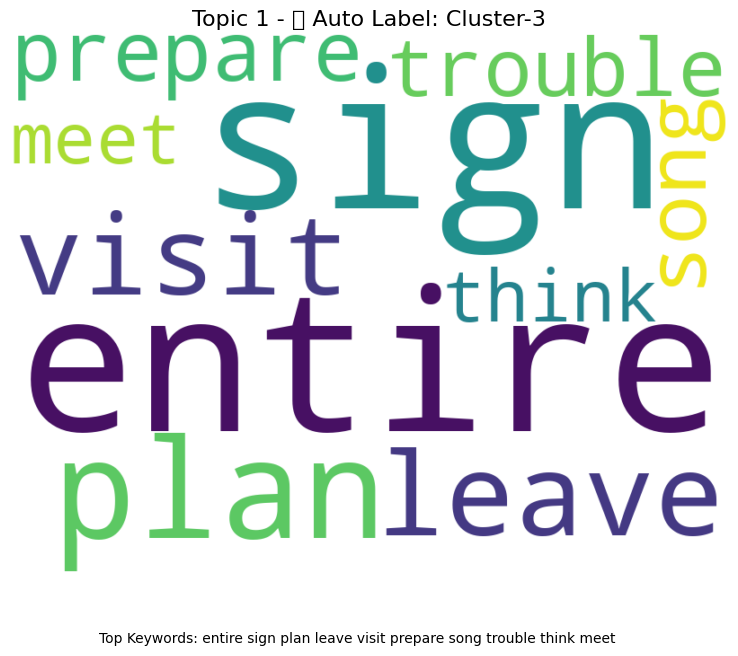

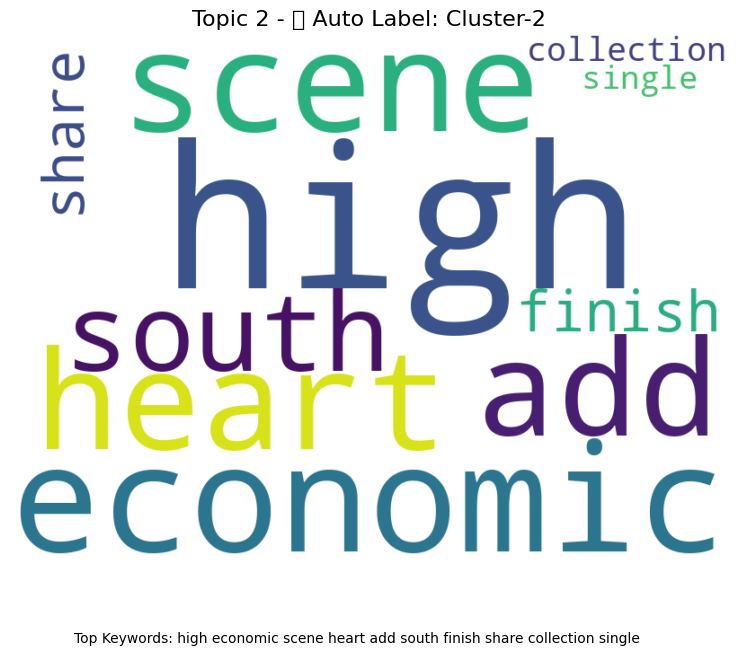

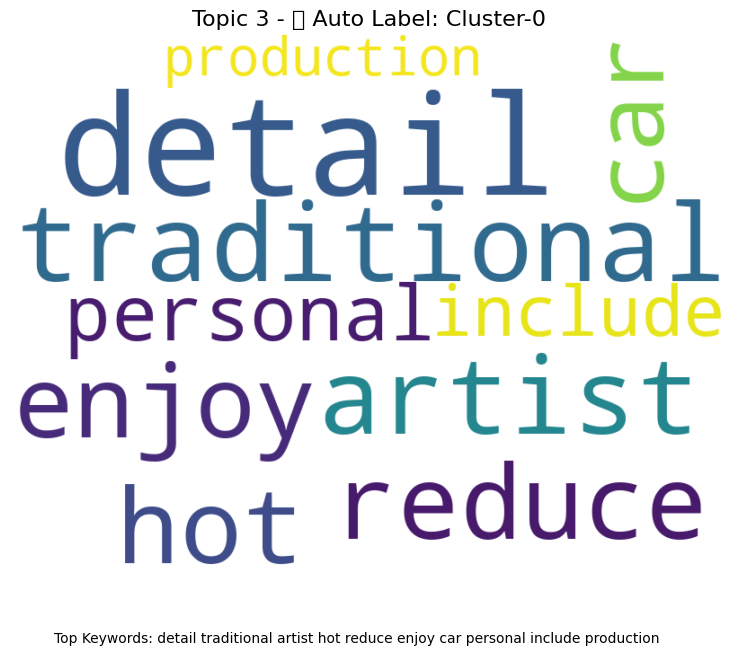

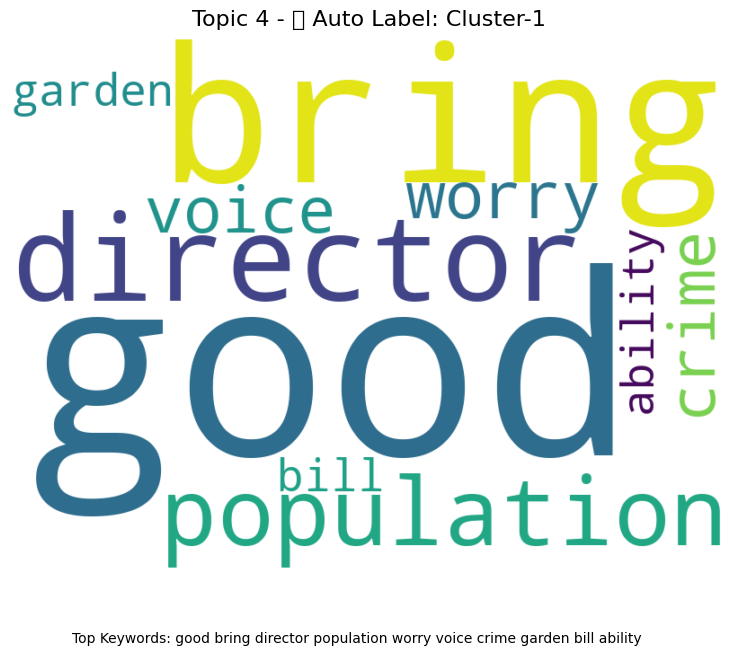

In [ ]:
# ✅ STEP 9: Display WordClouds with Auto Labels
for idx, topic in enumerate(final_lda.show_topics(num_topics=best_params[0], num_words=10, formatted=False)):
    word_freq = {word: prob for word, prob in topic[1]}
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {idx+1} - 🧠 Auto Label: {topic_labels[idx]}", fontsize=16)
    plt.figtext(0.5, 0.01, f"Top Keywords: {' '.join(word_freq.keys())}", wrap=True, ha='center', fontsize=10)
    plt.show()
